### Student Information
Name: 蘇暐中

Student ID: 109020021

GitHub ID: SWCst1020575

Kaggle name (Group): 這是一個整人的活動嗎？笑死人喔？主辦單位，出來解釋一下好不好

Kaggle name (User): Wei-Chung Su

Kaggle private scoreboard snapshot:

![Snapshot](../pics/kaggle.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [135]:
### Begin Assignment Here

## Part 1

### Load data

In [136]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [137]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [138]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [139]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Top 30 of training data.


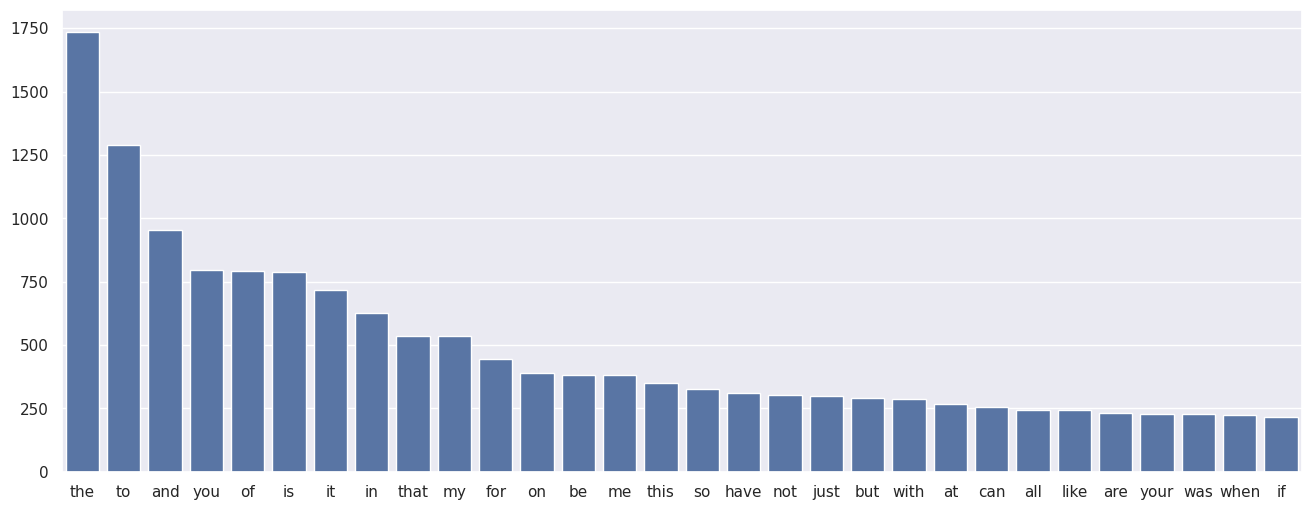

In [140]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
train_count = CountVectorizer(max_features=30)
train_text = train_count.fit_transform(train_df["text"]).toarray()

frequency = [sum(i) for i in train_text.T]
index = sorted(range(len(frequency)),reverse=True, key=lambda k: frequency[k])
rank = train_count.get_feature_names_out()[index]

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x=rank,y=sorted(frequency,reverse=True))
print("Top 30 of training data.")

Top 30 of testing data.


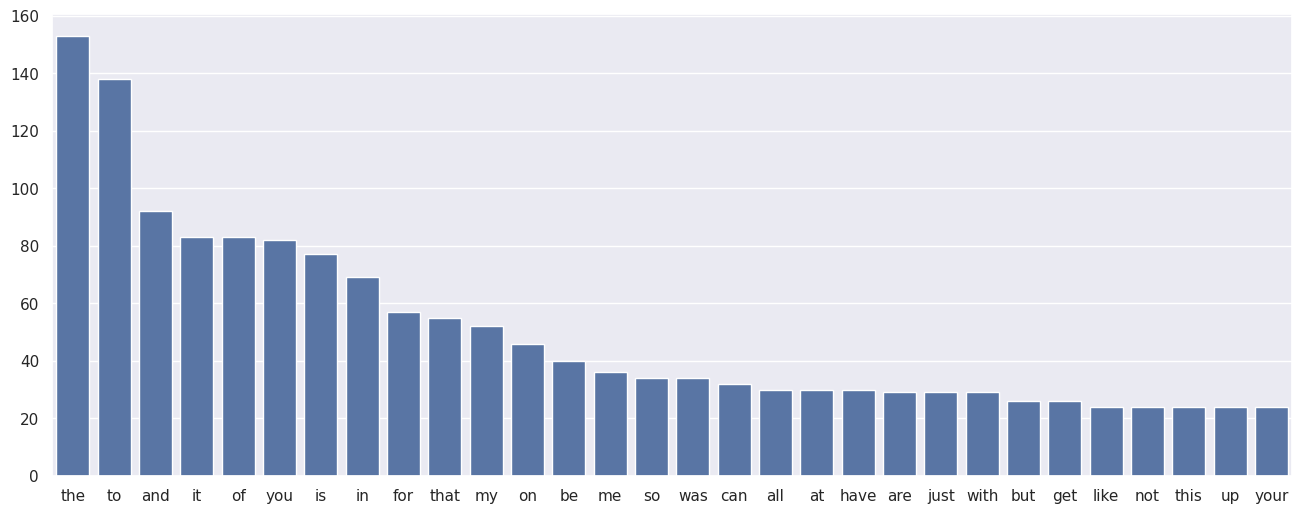

In [141]:
test_count = CountVectorizer(max_features=30)
test_text = train_count.fit_transform(test_df["text"]).toarray()

frequency = [sum(i) for i in test_text.T]
index = sorted(range(len(frequency)),reverse=True, key=lambda k: frequency[k])
rank = train_count.get_feature_names_out()[index]

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x=rank,y=sorted(frequency,reverse=True))
print("Top 30 of testing data.")

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
TF_Vec = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TF_Vec.fit(train_df['text'])

train_BOW = TF_Vec.transform(train_df['text'])

train_BOW.toarray()
feature_names = TF_Vec.get_feature_names_out()
feature_names[100:110]

/home/swc/AI/LLM/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

1. Confusion matrix helps us to observe precision and recall, so we can distinguish which labels are misclassified.
2. In the figure shows above, taking "anger" feature for example, there are 55 true positives, 27 false positives and 29 false negatives.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

From master

In [143]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [144]:
# from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [145]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

Answer here

Report for testing data:
              precision    recall  f1-score   support

       anger       0.53      0.73      0.61        84
        fear       0.79      0.59      0.68       110
         joy       0.65      0.81      0.72        79
     sadness       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg       0.67      0.65      0.65       347



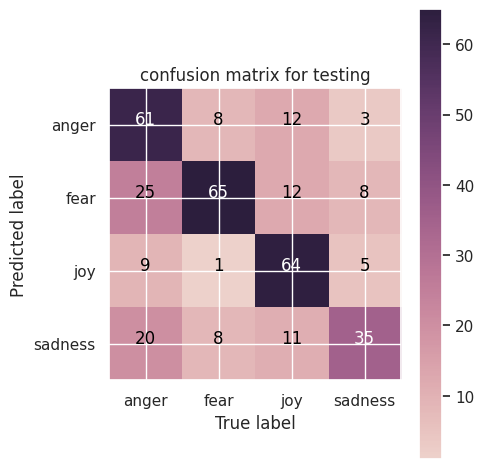

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(), y_train)

y_test_pred = gaussian.predict(X_test.toarray())

print("Report for testing data:")
print(classification_report(y_true=y_test, y_pred=y_test_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm, classes=['anger', 'fear', 'joy', 'sadness'], title='confusion matrix for testing')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision tree seems better than Naive Basyes in this dataset, since it has much higher f1-score, 0.68 > 0.65.
The training time of Naive Bayes is more quick, because of its lighter model. While the data is not conditionally independent completely, so decision tree performs better in this situation.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [147]:
# Set gpu support
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

From master

In [148]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [149]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 276       anger
2867    sadness
532       anger
3020    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [150]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [151]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [152]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 100
batch_size = 512

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 1.3715 - accuracy: 0.3028 - val_loss: 1.3700 - val_accuracy: 0.3343
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 1.3298 - accuracy: 0.3543 - val_loss: 1.3545 - val_accuracy: 0.3458
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.2961 - accuracy: 0.3936 - val_loss: 1.3366 - val_accuracy: 0.3775
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 1.2576 - accuracy: 0.4464 - val_loss: 1.3126 - val_accuracy: 0.4063
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 1.2092 - accuracy: 0.4996 - val_loss: 1.2819 - val_accuracy: 0.4323
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 1.1505 - accuracy: 0.5666 - val_loss: 1.2428 - val_accuracy: 0.4640
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0800 - accuracy: 0.6070 - val_loss: 1.1949 - val_accuracy: 0.4755
Epoch 8/100
8/8 [=========

In [153]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 1ms/step


array([[1.0846114e-02, 1.6579477e-06, 9.8703259e-01, 2.1197316e-03],
       [1.2119310e-02, 8.2628155e-01, 3.6014445e-02, 1.2558471e-01],
       [9.9737428e-02, 8.9935023e-01, 2.5645425e-04, 6.5592863e-04],
       [1.5880765e-08, 7.2011309e-05, 9.9992687e-01, 1.0819099e-06],
       [1.6226287e-01, 6.6087760e-02, 7.5345176e-01, 1.8197574e-02]],
      dtype=float32)

Answer here

In [154]:
import pandas as pd
log = pd.read_csv('logs/training_log.csv')
log[:5]

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.302795,1.371492,0.334294,1.369962
1,1,0.354276,1.329767,0.345821,1.354476
2,2,0.393579,1.296097,0.377522,1.336589
3,3,0.446443,1.257610,0.406340,1.312550
4,4,0.499585,1.209227,0.432277,1.281897


[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss')]

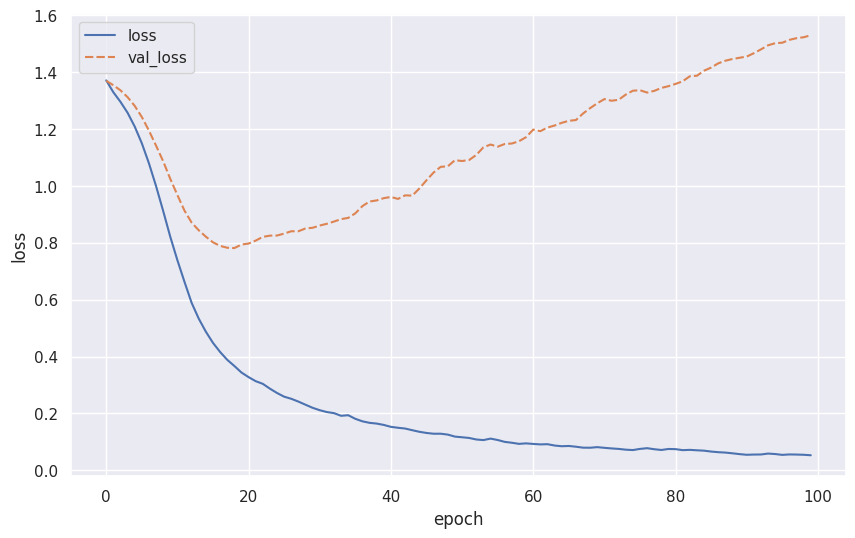

In [155]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(legend='brief',data=log.drop(["epoch","accuracy","val_accuracy"],axis=1))
ax.set(xlabel='epoch', ylabel='loss')

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'accuracy')]

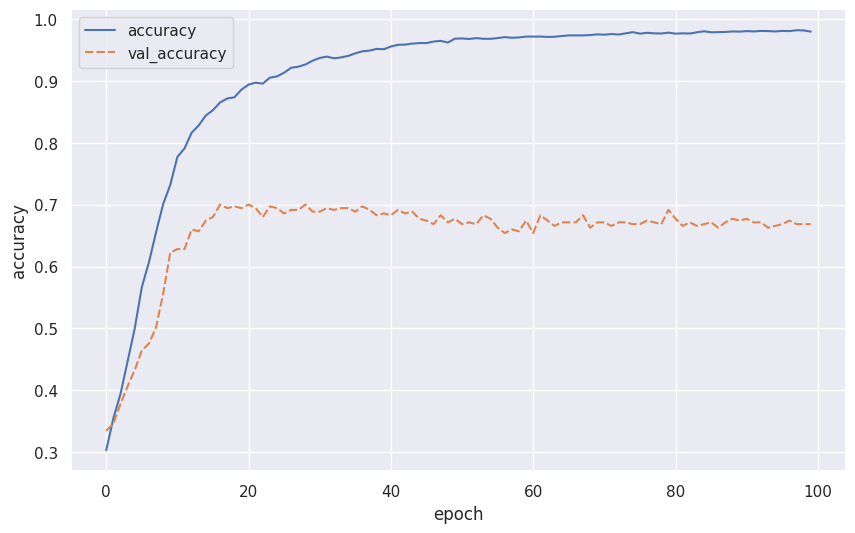

In [156]:
ax = sns.lineplot(legend='brief',data=log.drop(["epoch","loss","val_loss"],axis=1))
ax.set(xlabel='epoch', ylabel='accuracy')

1. In loss figure, we can find out the loss of testing data gets increasing after about 18 epoch, which means the model overfits.
2. Additionally, the accuracy of testing data is converge after about 18 epoch as well.
3. Thus, we can early stop the training to prevent overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [157]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([train_df,test_df],ignore_index=True)['text'])
vocab_size = len(tokenizer.word_index)+1

train_encoded_phrase = tokenizer.texts_to_sequences(train_df['text'])
test_encoded_phrase = tokenizer.texts_to_sequences(test_df['text'])

max_len = 0
for sent in train_encoded_phrase + test_encoded_phrase:
    if max_len < len(sent):
        max_len=len(sent)

X_train = pad_sequences(train_encoded_phrase, maxlen=max_len, dtype='int32', padding='pre', truncating='pre', value=0.0)
X_test = pad_sequences(test_encoded_phrase, maxlen=max_len, dtype='int32', padding='pre', truncating='pre', value=0.0)



In [158]:
import numpy as np
from gensim.models import KeyedVectors
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [159]:
word_index_tuple =  list(tokenizer.word_index.items())
embedding = [np.zeros((300,))]
for word in enumerate(word_index_tuple):
    try:
        embedding.append(w2v_google_model.get_vector(word[1][0]))
    except:
        embedding.append(np.zeros((300,)))
embedding = np.array(embedding)

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Embedding, LSTM, LSTM, ReLU, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=300,input_length=max_len,embeddings_initializer=Constant(embedding)))
model.add(LSTM(64,return_sequences=False))
model.add(Flatten())
model.add(Dense(4,activation='relu')) 
model.compile(optimizer=RMSprop(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

model.fit(X_train,y_train,batch_size=256,epochs=15)
pred_result = model.predict(X_test)

pred_result = label_decode(label_encoder, pred_result)
print(f'testing accuracy: {accuracy_score(label_decode(label_encoder, y_test), pred_result)}')
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 300)           3468000   
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 3561700 (13.59 MB)
Trainable params: 3561700 (13.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15
15/15 [==============================] - 2s 55ms/step - loss: 0.6884 - accuracy: 0.3374
Epoch 2/15
15/15 [==========================

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy words from w2v_google_model:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry words from w2v_google_model:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
sad words from w2v_google_model:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear words from w2v_google_model:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']


<Axes: xlabel='0', ylabel='1'>

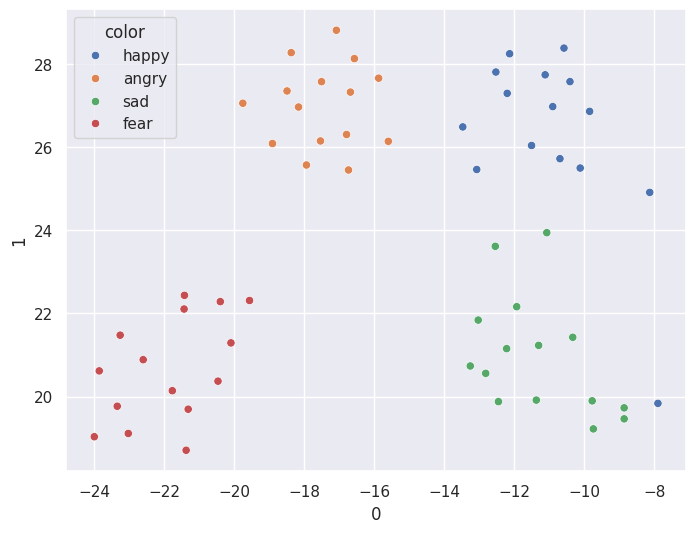

In [161]:
from sklearn.manifold import TSNE
happy = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=14)]
angry = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=14)]        
sad = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=14)]        
fear = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=14)]        

print(f'happy words from w2v_google_model: {happy}')
print(f'angry words from w2v_google_model: {angry}')
print(f'sad words from w2v_google_model: {sad}')
print(f'fear words from w2v_google_model: {fear}')

words = happy + angry + sad + fear


cn = 15
color = ['happy'] * 15 + ['angry'] * 15 + ['sad'] * 15 + ['fear'] * 15

size = 500
target_size = len(words)
all_words = list(w2v_google_model.index_to_key)
word_train = words + all_words[:size]
X_train = w2v_google_model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=42)

X_tsne = tsne.fit_transform(X_train)

df = pd.DataFrame(X_tsne)
df = pd.concat([df[:target_size],pd.Series(color,name="color")],axis=1)
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(data = df, x =0,y=1 , hue="color")

## Part 2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_identification = pd.read_csv("data_identification.csv")
emotion = pd.read_csv("emotion.csv")
tweets_DM = pd.read_json("tweets_DM.json",lines=True)

In [ ]:
tweets_DM[:5]

In [ ]:
print(tweets_DM["_index"].value_counts())
print(tweets_DM["_type"].value_counts())

Which implies _index and _type have exact 1 type of value. Therefore, we drop these two columns.

In [ ]:
tweets_drop = tweets_DM.drop(columns=["_index","_type"],axis=1)
tweets_drop[:5]

```json
{   // _source structure
    "tweet":{
        "hashtags":["tag","tag"],
        "tweet_id":"hash",
        "text": "post content ..."
    }
}
```

Extract dict from _source

In [ ]:
hashtags = [ np.array(row['tweet']['hashtags']) for row in tweets_drop.values[:,1][:,] ]
tweet_id = [ row['tweet']['tweet_id'] for row in tweets_drop.values[:,1][:,]]
text = [ row['tweet']['text'] for row in tweets_drop.values[:,1][:,]]

In [ ]:
tweets = pd.concat([tweets_drop,pd.Series(hashtags).to_frame("hashtags")
                    ,pd.Series(tweet_id).to_frame("tweet_id"),
                    pd.Series(text).to_frame("text")],axis=1)
tweets.drop(columns=["_source"],axis=1,inplace=True)

Remove @username, link and #tag in text

In [ ]:
def textPreprocessing(processingData):
    text = processingData["text"]
    new_text = []
    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        new_text.append(t)
    while "<LH>" in new_text:
        new_text.remove("<LH>")
    new_text = " ".join(new_text)
    for tag in processingData["hashtags"]:
        new_text = new_text.replace(f"#{tag}","")
    processingData["text"] = new_text
    return processingData
# tweets["text"] = tweets["text"].apply(textPreprocessing)
tweets = tweets.apply(textPreprocessing,axis=1)


Combine data and split train and test.

In [ ]:
tweets_identification = pd.merge(tweets,data_identification,on="tweet_id")
tweets_identification.drop("hashtags",axis=1,inplace=True)
tweets_train = tweets_identification[tweets_identification["identification"] == "train"]
tweets_test = tweets_identification[tweets_identification["identification"] == "test"]
tweets_train = pd.merge(tweets_train,emotion,on="tweet_id")
tweets_train.drop("identification",axis=1,inplace=True)
tweets_test.drop("identification",axis=1,inplace=True)

In [ ]:
tweets_y = tweets_train["emotion"]
# tweets_train.drop("emotion",axis=1,inplace=True)

Use Hugging Face Datasets

In [ ]:
from datasets import Dataset
# ignore score and date features.
dataset = Dataset.from_pandas(tweets_train.drop(["tweet_id","_crawldate","_score"],axis=1))

One-Hot encode for emotion

In [ ]:
from sklearn.preprocessing import OneHotEncoder
emotionEncoder = OneHotEncoder()
emotionEncoder.fit(tweets_y.to_numpy().reshape(-1,1))
y = emotionEncoder.transform(tweets_y.to_numpy().reshape(-1,1))

### Model

Use gpu

In [ ]:
import torch
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

Use [this pretrained model](https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion-latest) to fine tune.

In [ ]:
from transformers import RobertaForSequenceClassification,RobertaTokenizerFast
model = RobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-emotion-latest', num_labels=8, ignore_mismatched_sizes=True).to(device)
tokenizer = RobertaTokenizerFast.from_pretrained("cardiffnlp/twitter-roberta-base-emotion-latest")

Tokenize text

In [ ]:
def preprocess(data):
    newDict = {}
    text_tokenized = tokenizer(data["text"])
    labels = emotionEncoder.transform(np.array(data["emotion"]).reshape(-1,1))
    newDict["input_ids"] = text_tokenized["input_ids"]
    newDict["attention_mask"] = text_tokenized["attention_mask"]
    newDict["label"] = labels.toarray()
    return newDict
preprocessed = dataset.map(preprocess,batched=True)

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Split training data

In [ ]:
dataset = preprocessed.train_test_split(test_size=0.005,seed=42)
dataset

Measure performance with accuracy and f1-score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
    labels = pred.label_ids.argmax(-1)
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

Set up trainer for training

In [ ]:
from transformers import TrainingArguments,Trainer
training_args = TrainingArguments(
    output_dir='./results-latest-removeTag',
    num_train_epochs=10,
    learning_rate = 6e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=2500,
    load_best_model_at_end=True,
    evaluation_strategy="steps",
    save_strategy="steps",
    metric_for_best_model="f1",
    save_steps=50000,
    eval_accumulation_steps=1,
    fp16=True,
    fp16_full_eval =True
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator
)

In [ ]:
trainer.train("./results-latest-removeTag/checkpoint-300000")

### Predict

In [ ]:
def predPreprocess(data):
    newDict = {}
    text_tokenized = tokenizer(data["text"])
    newDict["input_ids"] = text_tokenized["input_ids"]
    newDict["attention_mask"] = text_tokenized["attention_mask"]
    return newDict

In [ ]:
pred_dataset = Dataset.from_pandas(tweets_test.drop(["tweet_id","_crawldate","_score"],axis=1))
pred_preprocessed = pred_dataset.map(predPreprocess,batched=True)

Load local model trained above

In [ ]:
pred_model = RobertaForSequenceClassification.from_pretrained('./results-latest-removeTag/checkpoint-110000', num_labels=8, ignore_mismatched_sizes=True).to(device)
pred_trainer = Trainer(
        model=pred_model,
        args=training_args,
        train_dataset=None,
        eval_dataset=None,
        compute_metrics=compute_metrics,
        tokenizer=tokenizer,
        data_collator=data_collator,
    )

In [ ]:
# predictions, labels, metrics = trainer.predict(pred_preprocessed)
predictions, labels, metrics = pred_trainer.predict(pred_preprocessed)

Decode one-hot labels and write output file.

In [ ]:
predictions = torch.from_numpy(predictions)
pred_result = torch.argmax(predictions,dim=1).to(device)
pred_labels = torch.nn.functional.one_hot(pred_result)
pred_emotion = emotionEncoder.inverse_transform(pred_labels.cpu()).flatten()

In [ ]:
id_emotion = np.concatenate([tweets_test["tweet_id"].to_numpy().reshape(-1,1),pred_emotion.reshape(-1,1)],axis=1)
id_emotion = pd.DataFrame(id_emotion,columns=["id","emotion"])
sample = pd.read_csv("sampleSubmission.csv").drop("emotion",axis=1)
output = pd.merge(sample,id_emotion,on="id")
output.to_csv("output.csv",index=False)

### Discussion

* First, I tried only replace @user and link for training. The f1-score of validation data seemed to increase unstably. 

    Then, I remove all @user, link and #tag in the tweet text, and the f1-score of validation data became more stably increasing, and my result of kaggle score got higher.

    Therefore, I think @user, link and #tag are noises for the emotion detection. The  comparison shows in below figures.

![result1](../pics/result1.png)
![result_compare](../pics/result_compare.png)

* If I tried to train further, the loss of training data got less, while the loss of validation data didn't decrease after 100000 step (around 3 epochs), but got increasing after 200000 steps. 

    It show that my model has overfitted after 200000 steps.

![result2](../pics/result2.png)